# Tensorflow2.0 小练习

In [2]:
import tensorflow as tf
import numpy as np

## 实现softmax函数

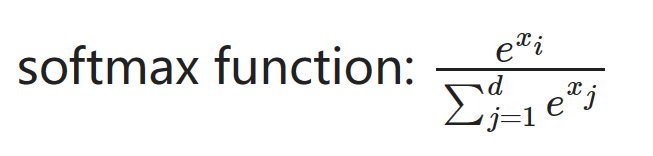

In [4]:
def softmax(x):
    ##########
    '''实现softmax函数，只要求对最后一维归一化，
    不允许用tf自带的softmax函数'''
    ##########
    x_exp = tf.math.exp(x)
    exp_sum=tf.math.reduce_sum(x_exp,axis=-1)
    exp_sum_vetor=tf.reshape(exp_sum,shape=[-1,1])
    prob_x=x_exp/exp_sum_vetor
    return prob_x

test_data = np.random.normal(size=[10, 5])
(softmax(test_data).numpy() - tf.nn.softmax(test_data, axis=-1).numpy())**2 <0.0001

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## 实现sigmoid函数
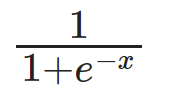

In [5]:
def sigmoid(x):
    ##########
    '''实现sigmoid函数， 不允许用tf自带的sigmoid函数'''
    ##########
    exp=tf.math.exp(-x)
    prob_x=1/(1+exp)
    return prob_x

test_data = np.random.normal(size=[10, 5])
(sigmoid(test_data).numpy() - tf.nn.sigmoid(test_data).numpy())**2 < 0.0001

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## 实现 softmax 交叉熵loss函数
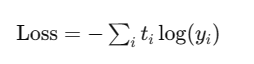

In [6]:
def softmax_ce(p, label):
    ##########
    '''实现 softmax 交叉熵loss函数， 不允许用tf自带的softmax_cross_entropy函数'''
    ##########
    loss = tf.reduce_mean(tf.reduce_sum(-label*tf.math.log(p), axis=1))
    return loss

test_data = np.random.normal(size=[10, 5])
prob = tf.nn.softmax(test_data)
label = np.zeros_like(test_data)
label[np.arange(10), np.random.randint(0, 5, size=10)]=1.

((tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(label, test_data))
  - softmax_ce(prob, label))**2 < 0.0001).numpy()

True

## 实现 sigmoid 交叉熵loss函数
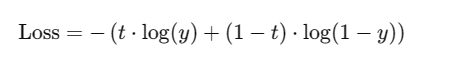

In [9]:
def sigmoid_ce(p, label):
    ##########
    '''实现 softmax 交叉熵loss函数， 不允许用tf自带的softmax_cross_entropy函数'''
    ##########
    losses = -(label * tf.math.log(p) + (1-label) * tf.math.log(1-p)) 
    loss = tf.reduce_mean(losses)
    return loss

test_data = np.random.normal(size=[10])
prob = tf.nn.sigmoid(test_data)
label = np.random.randint(0, 2, 10).astype(test_data.dtype)
print (label)

((tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(label, test_data))- sigmoid_ce(prob, label))**2 < 0.0001).numpy()


[1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]


True